In [ ]:
# nan 값이 얼마나 있는지 column별로 확인하기
df.isnull().sum()

# 전체 data 개수 대비 NaN의 비율
df.isnull().sum() / len(df)
# 결측치 row 날려버리기
# 튜플에서 데이터가 하나라도 없으면 날려버리기
df = df.dropna()

# 모든 데이터가 NaN일 때만 날려버리기
df = df.dropna(how='all')

# column을 기준으로 nan 값이 4개 이상이면 해당 column  날려버리기
df = df.dropna(axis=1, thres=3)
# 결측치를 채워버리기
# NaN을 0으로 채워버리기
df.fillna(0)

# 평균값으로 채워버리기
df['col1'].fillna(df['col1'].mean(), inplace=True)                                    

# 그룹 범주로 나눠서 그룹별 평균값으로 채워버리기
df['col1'].fillna(df.groupby('sex')['col1'].transform('mean'), inplace=True)
df[df['A'].notnull() & df['B'].notnull()] # 컬럼 A와 B 모두 Null이 아닌 경우만 표시

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('C://application_train.csv')

# 컬럼별 type 확인 및 결측치 확인
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [2]:
# 문자전환
data = data.replace(' ', '')

# 만약 결측치가 문자열 스페이스(' ')로 되어 있다면, np.nan으로 바꾸어 Pandas 라이브러리가 인식할수 있도록 변환
data = data.replace('', np.nan)

# 결측 row 제거하는 방법
data.dropna(how='all') # 'all':한 행이 모두 missing value이면 제거, any': 행 내에서 하나라도

# 결측치 처리
data.fillna(0, inplace=True)

# 처리 방식에 따른 컬럼 정리
category_list = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']
one_hot_list = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',
                'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','CODE_GENDER','EMERGENCYSTATE_MODE']

In [3]:
# categorize
categories_encoded = pd.DataFrame()
cate_cols = []

for x in category_list:

    print(x)
    X = data[x]
    x_encoded, x_categories = X.factorize()

    # dataframe
    temp_df = pd.DataFrame(x_encoded)
    categories_encoded = pd.concat([categories_encoded,temp_df],axis=1)

    # 컬럼명 추가
    cate_cols.append(x + '_1')

# 컬럼명 수정
categories_encoded.columns = [cate_cols]

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY


In [4]:
categories_encoded.head()

,NAME_CONTRACT_TYPE_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1
0,0,0,0
1,0,0,1
2,1,1,0
3,0,0,0
4,0,0,0


In [ ]:
# 항목별 맥스값 체크 (확인용)
for x in category_list:
    print(x)
    col = x + '_1'
    print(col)
    print(max(categories_encoded[col].values))
    
    print(x, ' max : ', max(categories_encoded[col].values)[0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# One-Hot-Encoder
onehot_encoded = pd.DataFrame()
onehot_cols = []

for x in one_hot_list:

    print(x)
    X = data[x]
    x_encoded, x_categories = X.factorize()
    x_1hot = encoder.fit_transform(x_encoded.reshape(-1,1))
    x_1hot = x_1hot.toarray()    

    # dataframe
    temp_df = pd.DataFrame(x_1hot)
    onehot_encoded = pd.concat([onehot_encoded,temp_df],axis=1)

    # 컬럼명 추가
    for i in range(1, temp_df.shape[1] +1):
        onehot_cols.append(x + '_' + str(i))

# 컬럼명 수정
onehot_encoded.columns = [onehot_cols]

# 항목별 맥스값 체크 (확인용)
for x in one_hot_list:
    col = x + '_1'
    print(x, ' max : ', max(onehot_encoded[col].values)[0])

# 모두 1이면 정상

In [5]:
from io import StringIO
import pandas as pd

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df.dtypes

x1             Int64
x2           float64
x3           float64
x4    datetime64[ns]
x5            object
dtype: object

In [6]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [7]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [8]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()


<Figure size 2500x1000 with 2 Axes>

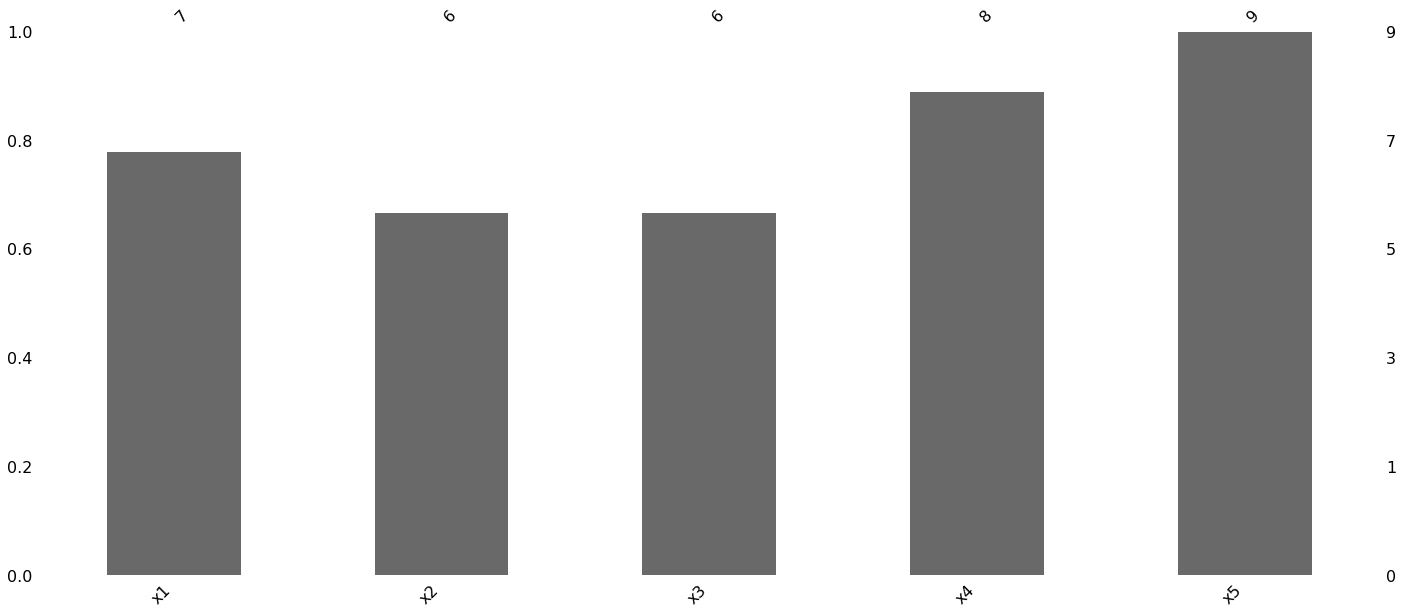

In [10]:
msno.bar(df)
plt.show()

In [11]:
df.dropna()


,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [12]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,NaN,2019-01-04,A
4,5,2019-01-05,B
5,NaN,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


In [13]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,NaN,2019-01-04,A
4,5,2019-01-05,B
5,NaN,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


In [14]:
df.dropna(thresh=4)

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
2,3,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [15]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [16]:
import seaborn as sns 
df = sns.load_dataset("titanic")
df.tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


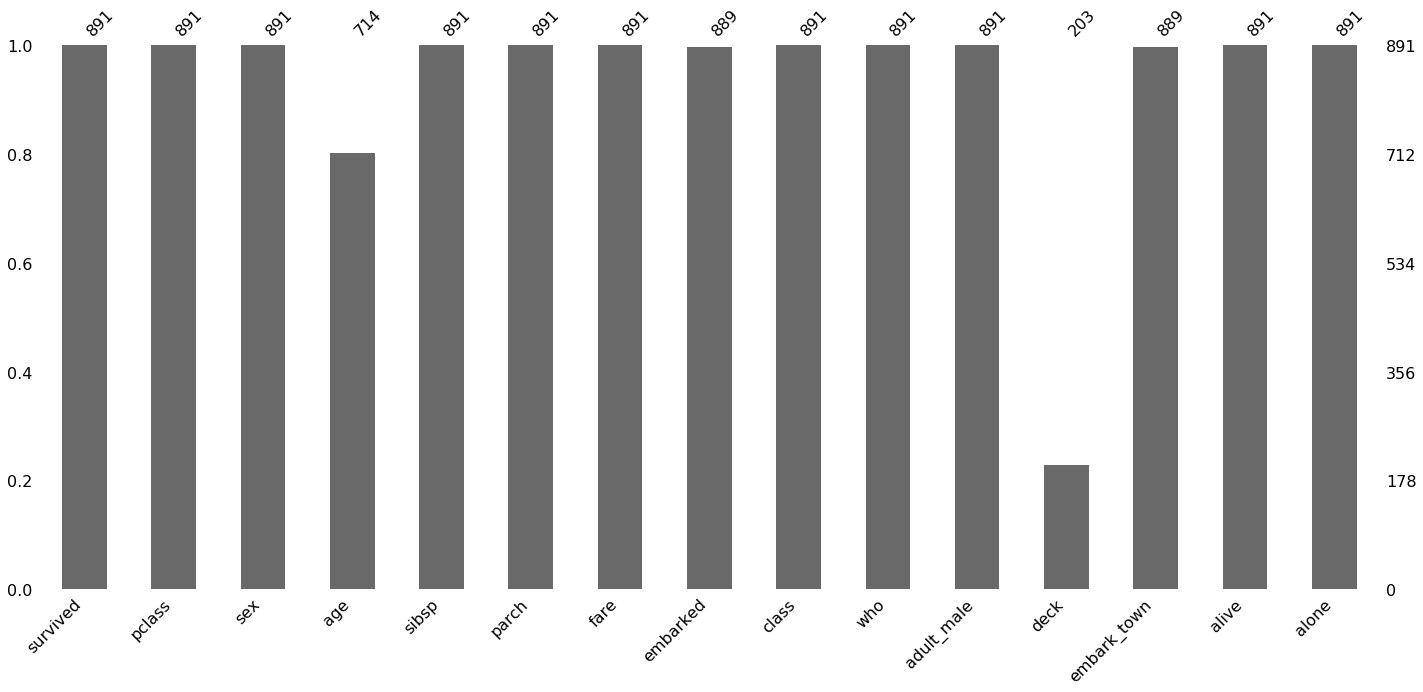

In [17]:
msno.bar(df)
plt.show()

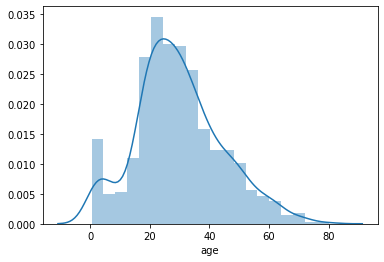

In [18]:

sns.distplot(df.age.dropna())
plt.show()

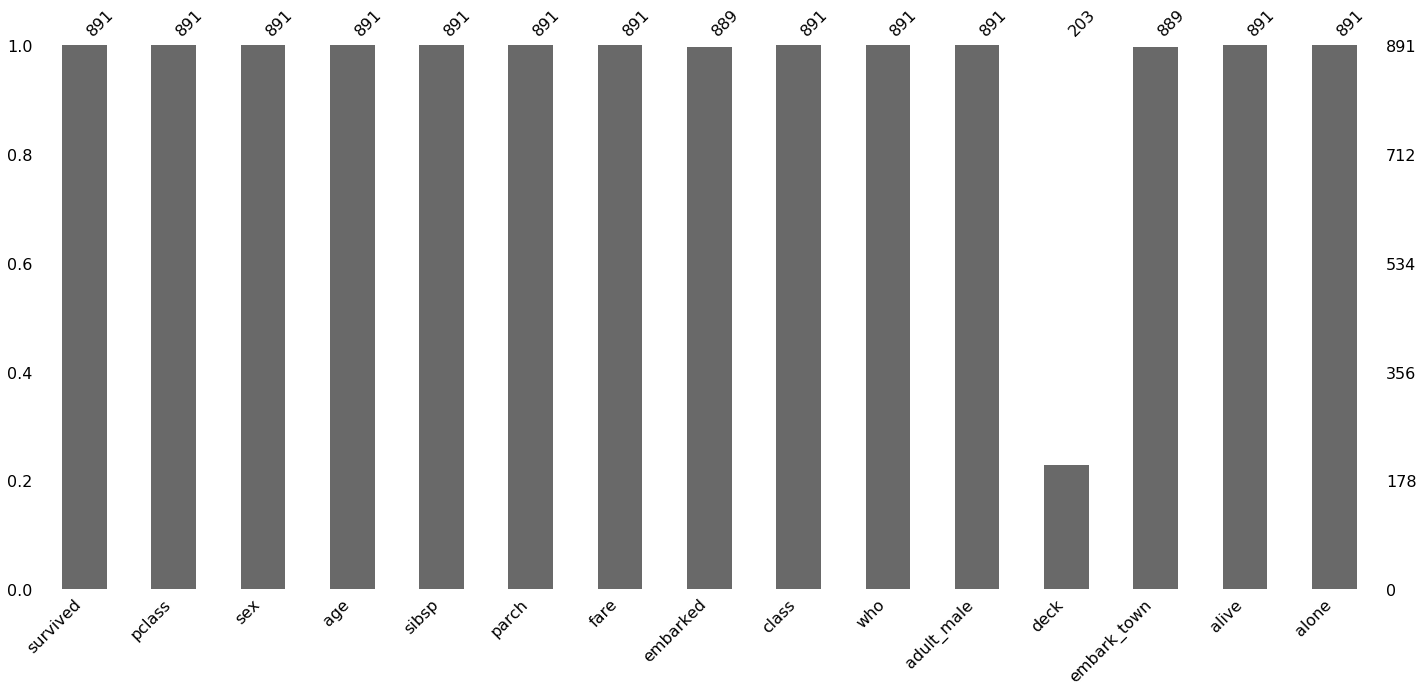

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_copy1 = df.copy()
df_copy1["age"] = imputer.fit_transform(df.age.values.reshape(-1,1))

msno.bar(df_copy1)
plt.show()

In [ ]:
df.groupby(df.pclass).age.median()
df_copy2 = df.copy()
df_copy2["age"] = df.groupby(df.pclass).age.transform(lambda x: x.fillna(x.median()))

g = sns.FacetGrid(df_copy2, hue="pclass", height=4, aspect=2)
g.map(sns.kdeplot, "age")
plt.show()